# Task-02

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import csv

# Importing Dataset

In [2]:
#Importing Gender Data
df = pd.read_csv(r'C:\Users\Dell\Desktop\Prodigy_task\Task 2\titanic\gender_submission.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
#Importing Test Dataset
df1 = pd.read_csv(r'C:\Users\Dell\Desktop\Prodigy_task\Task 2\titanic\test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Set PassengerId as index
df1.set_index('PassengerId')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [6]:
#Importing Train Dataset
df2 = pd.read_csv(r'C:\Users\Dell\Desktop\Prodigy_task\Task 2\titanic\train.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Set PassengerId as index
df2.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Performing Data Preprocessing

In [8]:
print('Shape of Gender Data :->',df.shape)
print('---------------------------------\n')
print('Shape of Test Data:->',df1.shape)
print('---------------------------------\n')
print('Shape of Train Data:->',df2.shape)

Shape of Gender Data :-> (418, 2)
---------------------------------

Shape of Test Data:-> (418, 11)
---------------------------------

Shape of Train Data:-> (891, 12)


In [9]:
print('Columns in Gender data:->',df.columns)
print('------------------------------------------------------------------------------------------\n')
print('Columns in test data:->',df1.columns)
print('------------------------------------------------------------------------------------------\n')
print('Columns in train data:->',df2.columns)

Columns in Gender data:-> Index(['PassengerId', 'Survived'], dtype='object')
------------------------------------------------------------------------------------------

Columns in test data:-> Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------------------------------------------------------------------------

Columns in train data:-> Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
df.info()
print('----------------------------------------------\n')
df1.info()
print('----------------------------------------------\n')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 

# Checking Null Values 

In [11]:
#Checking Null Values In Gender Dataset
df.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [12]:
#Checking Null Values in Test Dataset
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Fare'].fillna(df1['Fare'].median(), inplace=True)
df1['Cabin'].fillna('N/A' ,inplace=True)

In [14]:
df1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
#Checking Null values in Test Dataset
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df2['Age'].fillna(df2['Age'].median(), inplace=True)
df2['Cabin'].fillna('N/A' ,inplace=True)
df2['Embarked'].fillna('N/A' ,inplace=True)

In [17]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
#Checking Duplicate Values in each dataset

print('Duplicate values In Gender Data:->',df.duplicated().sum())
print('-----------------------------------\n')
print('Duplicate values In Test Data:->',df1.duplicated().sum())
print('-----------------------------------\n')
print('Duplicate values In Train Data:->',df2.duplicated().sum())

Duplicate values In Gender Data:-> 0
-----------------------------------

Duplicate values In Test Data:-> 0
-----------------------------------

Duplicate values In Train Data:-> 0


In [19]:
#Checking missing Values in each Dataset

print('Checking Missing Values in Gender Values:->',df.isna().sum().any())
print('--------------------------------------------------\n')
print('Checking Missing Values in Test Values:->',df1.isna().sum().any())
print('--------------------------------------------------\n')
print('Checking Missing Values in Train Values:->',df2.isna().sum().any())

Checking Missing Values in Gender Values:-> False
--------------------------------------------------

Checking Missing Values in Test Values:-> False
--------------------------------------------------

Checking Missing Values in Train Values:-> False


In [20]:
# Statistical summary of Gender Dataset
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [21]:
# Statistical summary of Test Dataset
df1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
# Statistical summary of Train Dataset
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df2.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

approximately 38% of the passengers survived, while about 62% did not survive the disaster.

In [24]:
count_of_males = len(df1[df1['Sex']== 'male'])
print('No of Males :-->',count_of_males)

No of Males :--> 266


In [25]:
count_of_females = len(df1[df1['Sex']== 'female'])
print('No of Males :-->',count_of_females)

No of Males :--> 152


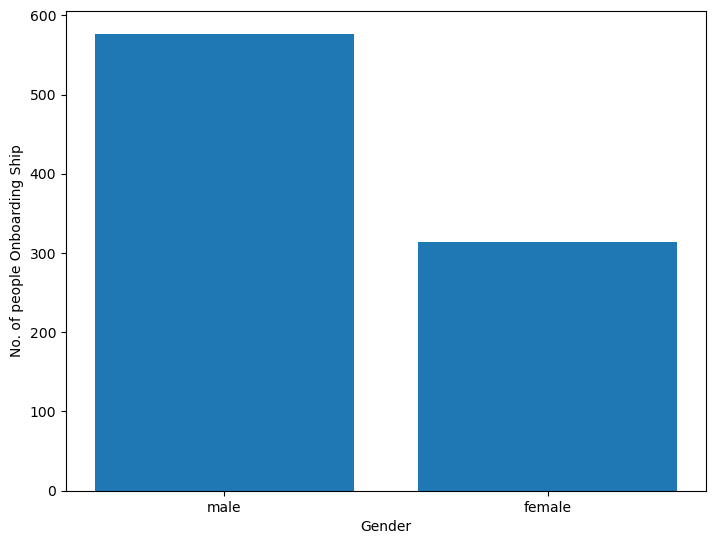

In [26]:
# plotting graph 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['male','female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel('Gender')
plt.ylabel('No. of people Onboarding Ship')
plt.show()

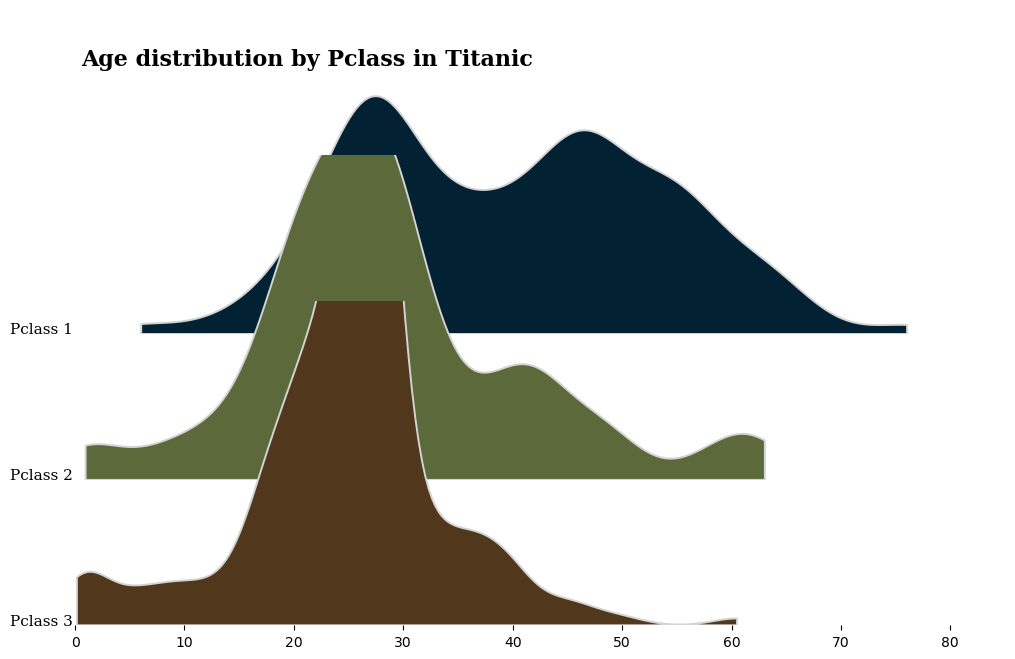

In [28]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(df1['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=df1[df1['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray',color=c, alpha=1) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

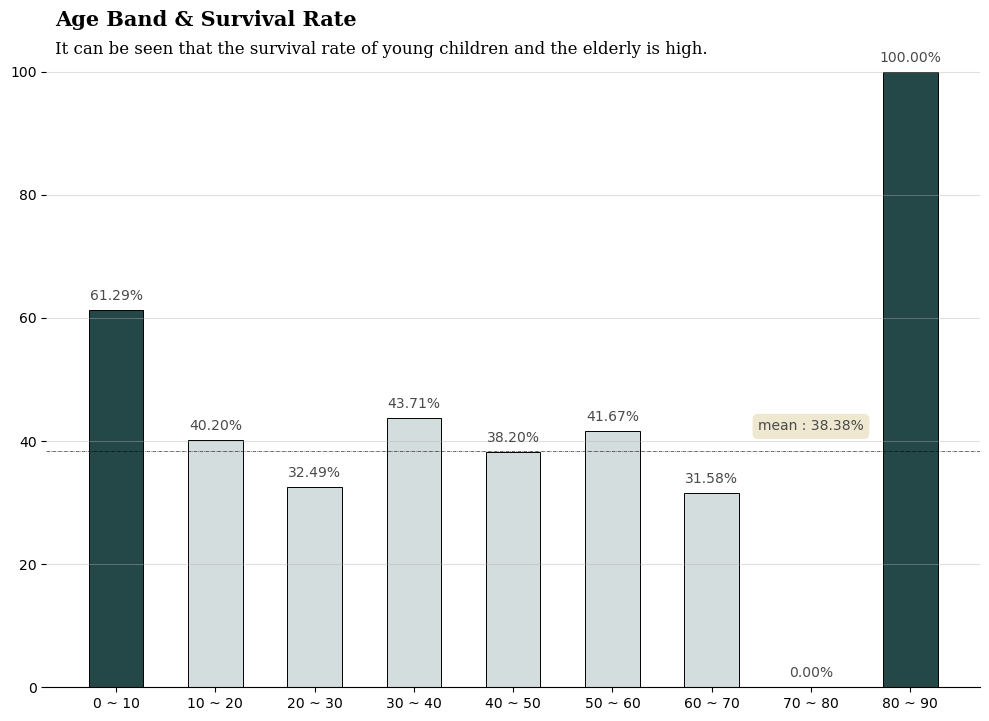

In [33]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

df2['age_band'] = df2['Age'].apply(age_band)
titanic_age = df2[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = df2['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()